In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Взять монохромное изображение размером не более 1000x1000 пикселей и добавить к нему гауссовый шум с параметрами, приведенными в таблице 1. Взять монохромное изображение размером не более 1000x1000 пикселей и добавить к нему гауссовый шум с параметрами


Разрешение изображения:  (750, 563)


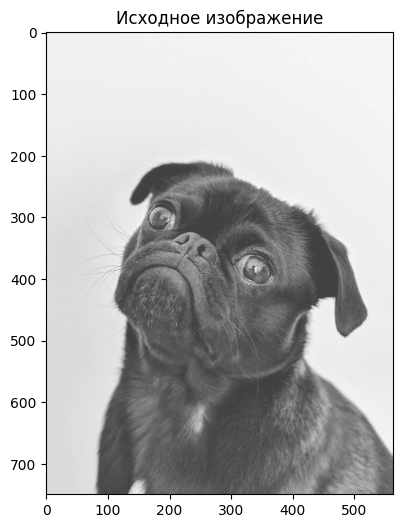

In [ ]:
pic = plt.imread("dog.png")

if len(pic.shape) == 3:
    pic = np.mean(pic, axis=2)

if pic.dtype != np.uint8:
    pic = (pic * 255).astype(np.uint8)

plt.figure(figsize=(12,6))
print("Разрешение изображения: ", pic.shape)
plt.imshow(pic, cmap='gray',vmin=0,vmax=255)
plt.title("Исходное изображение")
plt.show()

In [8]:
mean = 50
sigma = 22
q = np.random.normal(mean, sigma, pic.shape[0]*pic.shape[1])

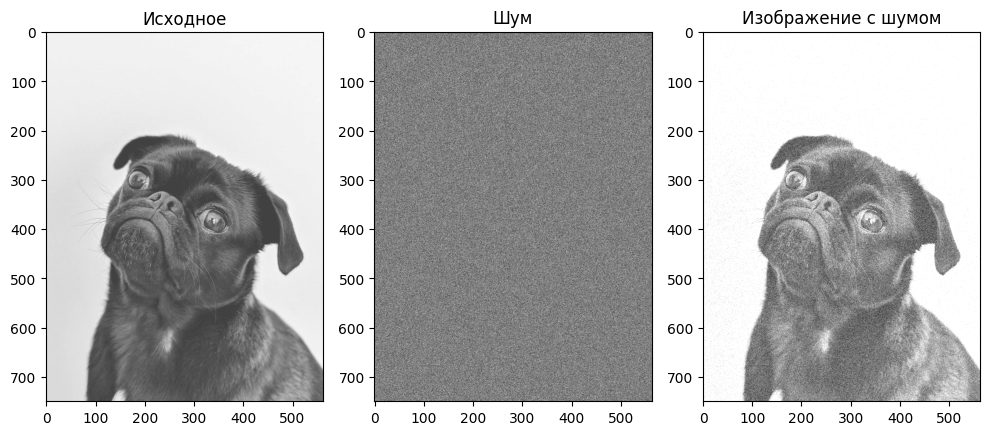

In [9]:
output = q.reshape((pic.shape))
new = pic + output
new = np.clip(new,0,255)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(pic, cmap='gray',vmin=0,vmax=255)
plt.title('Исходное')

plt.subplot(1,3,2)
plt.imshow(output, cmap='gray')
plt.title('Шум')

plt.subplot(1,3,3)
plt.imshow(new, cmap='gray')
plt.title('Изображение с шумом')
plt.tight_layout()
plt.show()

### 2) ) Написать функцию на языке Python для сглаживающей фильтрации (9x5)

In [10]:
kernel = np.array([
        [1,  1,  1,  1,  1],
        [1,  2,  2,  2,  1],
        [2,  4,  4,  4,  2],
        [3,  6,  8,  6,  3],
        [4,  8, 16,  8,  4],  
        [3,  6,  8,  6,  3],
        [2,  4,  4,  4,  2],
        [1,  2,  2,  2,  1],
        [1,  1,  1,  1,  1]
    ])

kernel= kernel/kernel.sum()

In [11]:
def convolution(picture: np.array, kernel: np.array)->np.array:
    kernel_h, kernel_w = kernel.shape
    picture_h, picture_w = picture.shape
    stride = 1
    padding = 0 
    """
    формула lдля нового изображеня:
        W(out) = (W(in) - kernel_W + 2*Padding)/Stride +1
        H(out) = (H(in) - kernel_H + 2*Padding)/Stride +1
        Padding - заполнение вокруг границ
        Stride - шаг пикселя
    """
    new_picture = np.zeros((
       int((picture_h - kernel_h + 2*padding)/stride+1),
       int((picture_w - kernel_w + 2*padding)/stride+1)))
   
    for h in range(new_picture.shape[0]):
        for w in range(new_picture.shape[1]):
            new_picture[h,w] = np.sum(picture[h: h + kernel_h, w:w + kernel_w] * kernel)
    
    return new_picture.astype(np.uint8)

Рамземер исходнонго  (750, 563)
Рамземер нового  (742, 559)


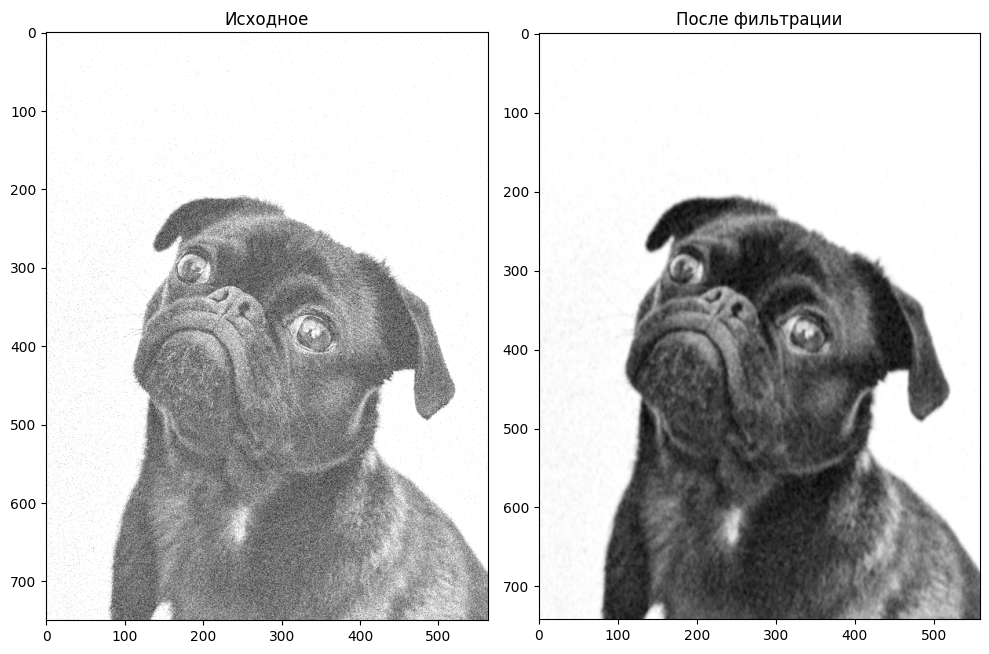

In [12]:
pic_conv = convolution(new,kernel)

print("Рамземер исходнонго ", pic.shape)
print("Рамземер нового ", pic_conv.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(new,cmap='gray')
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(pic_conv,cmap='gray')
plt.title('После фильтрации')

plt.tight_layout()
plt.show()

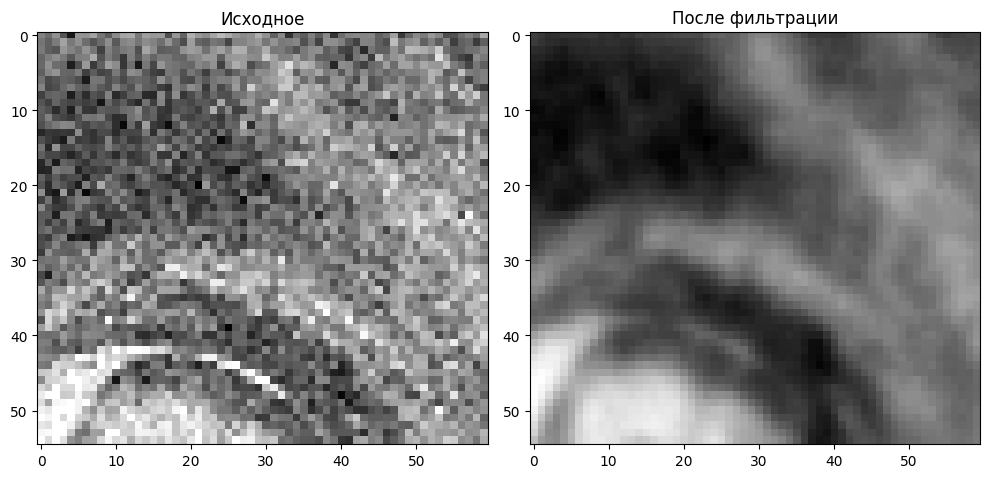

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(new[320:375,320:380],cmap='gray')
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(pic_conv[320:375,320:380],cmap='gray')
plt.title('После фильтрации')

plt.tight_layout()
plt.show()

### 3) Взять монохромное изображение размером не более 1000x1000 пикселей и добавить к нему шум типа соль и перец с параметрами

In [17]:
def salt_pepper(img, P_s, P_p):
 
    output = np.copy(img).reshape((img.size))
    num_salt = np.ceil(P_s * img.size)
    coords = np.random.randint(0, img.size - 1, int(num_salt))
    output[coords] = 255
    num_pepper = np.ceil(P_p * img.size)
    coords = np.random.randint(0, img.size - 1, int(num_pepper))
    output[coords] = 0
    return output.reshape(img.shape)


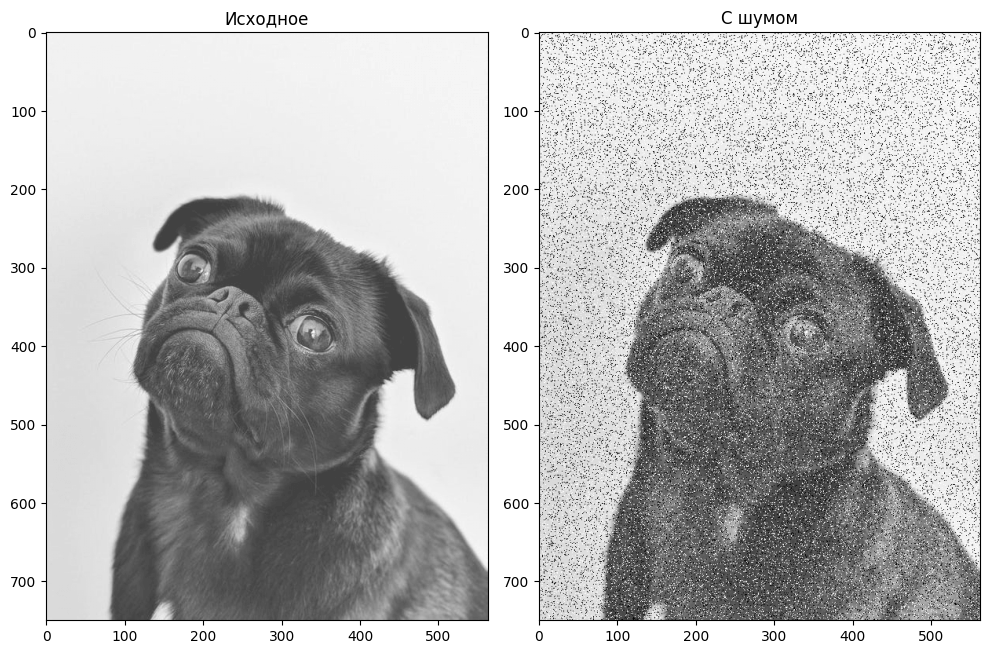

In [18]:
P_s = 0.1
P_p = 0.08

new_pic = salt_pepper(pic,P_s,P_p)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray',vmin=0,vmax=255)
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(new_pic,cmap='gray',vmin=0,vmax=255)
plt.title('C шумом')

plt.tight_layout()
plt.show()

### 4) Написать функцию на языке Python для ранговой фильтрации (19×19)

In [19]:
def convolution_Rang(picture: np.array, kernel: np.array, rang:int)->np.array:
    kernel_h, kernel_w = kernel.shape
    picture_h, picture_w = picture.shape
    stride = 1
    padding = 0 
    """
    формула lдля нового изображеня:
        W(out) = (W(in) - kernel_W + 2*Padding)/Stride +1
        H(out) = (H(in) - kernel_H + 2*Padding)/Stride +1
        Padding - заполнение вокруг границ
        Stride - шаг пикселя
    """
    new_picture = np.zeros((
       int((picture_h - kernel_h + 2*padding)/stride+1),
       int((picture_w - kernel_w + 2*padding)/stride+1)))
    
    
   
    for h in range(new_picture.shape[0]):
        for w in range(new_picture.shape[1]):
            kernel = picture[h: h + kernel_h, w:w + kernel_w]
            flatten_kernel = kernel.flatten()
            sort_flatten_kernel = np.sort(flatten_kernel)
            new_picture[h,w] = sort_flatten_kernel[rang]
    
    return new_picture.astype(np.uint8)

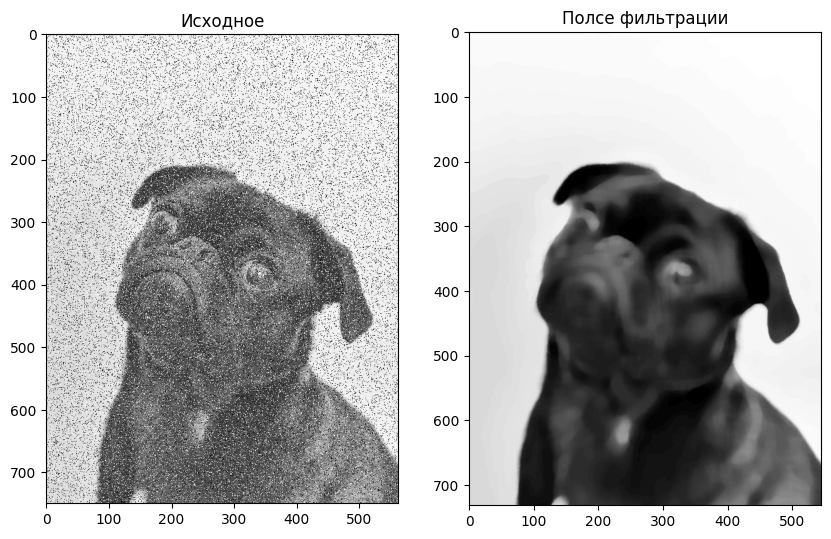

In [20]:
kernael_rang = np.zeros((19,19))
rang =201
out_pic = convolution_Rang(new_pic,kernael_rang,201)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(new_pic,cmap='gray')
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(out_pic,cmap='gray')
plt.title('Полсе фильтрации')
plt.show()

### 5) Разработать функцию, реализующую метод повышения резкости
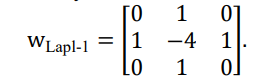

In [228]:
def convolution_Wlap(picture: np.array, kernel: np.array)->np.array:
    kernel_h, kernel_w = kernel.shape
    picture_h, picture_w = picture.shape
    stride = 1
    padding = 0 
    """
    формула lдля нового изображеня:
        W(out) = (W(in) - kernel_W + 2*Padding)/Stride +1
        H(out) = (H(in) - kernel_H + 2*Padding)/Stride +1
        Padding - заполнение вокруг границ
        Stride - шаг пикселя
    """
    Wlap_pic = np.zeros((
       int((picture_h - kernel_h + 2*padding)/stride+1),
       int((picture_w - kernel_w + 2*padding)/stride+1)))
    
    S_pic = Wlap_pic.copy()
   
    for h in range(Wlap_pic.shape[0]):
        for w in range(Wlap_pic.shape[1]):
            Wlap_pic[h,w] = np.sum(picture[h: h + kernel_h, w:w + kernel_w] * kernel)
            S_pic[h,w] = picture[h][w]
            
    D_pic = S_pic - Wlap_pic
    
    
    return Wlap_pic, D_pic

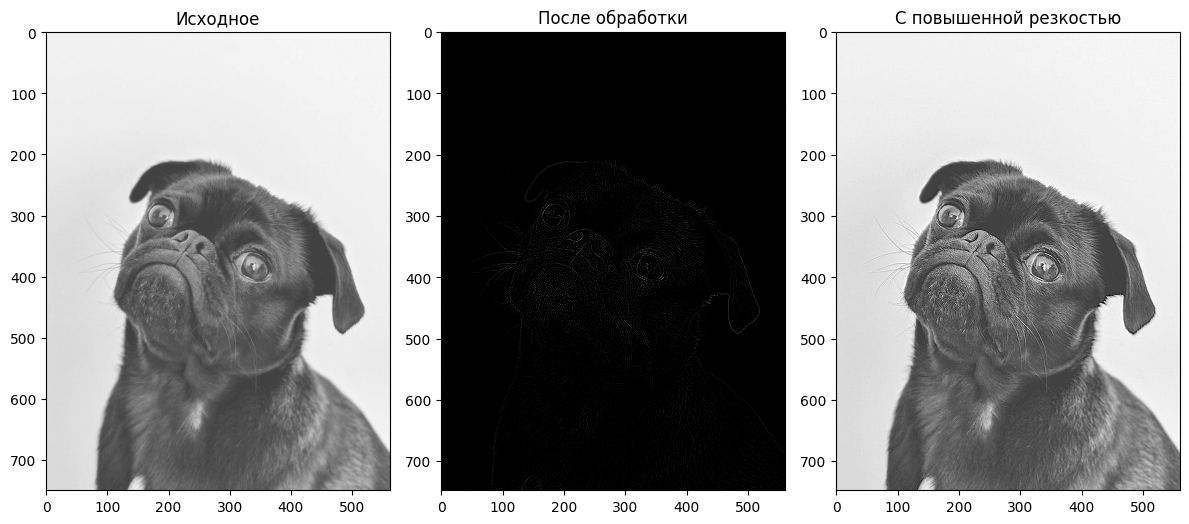

In [229]:
w = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])


w_pic, d_pic = convolution_Wlap(pic,w)

plt.figure(figsize=(12,15))
plt.subplot(1,3,1)
plt.imshow(pic,cmap='gray',vmin=0,vmax=255)
plt.title('Исходное')

plt.subplot(1,3,2)
plt.imshow(w_pic,cmap='gray',vmin=0,vmax=255)
plt.title('После обработки')

plt.subplot(1,3,3)
plt.imshow(d_pic,cmap='gray',vmin=0,vmax=255)
plt.title('C повышенной резкостью')
plt.tight_layout()
plt.show()

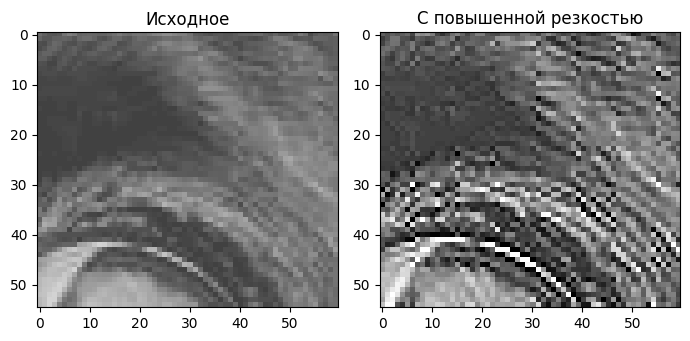

In [230]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(pic[320:375,320:380],cmap='gray',vmin=0,vmax=255)
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(d_pic[320:375,320:380],cmap='gray',vmin=0,vmax=255)
plt.title('C повышенной резкостью')
plt.tight_layout()
plt.show()

### 6) Разработать функцию, реализующую метод выделения краев на изображении (Собель)

In [231]:
def convolution_Sobele(picture: np.array)->np.array:

    Dx = np.array([
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]
        ])
    
    Dy = np.array([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
        ])

    kernel_h, kernel_w = Dx.shape
    picture_h, picture_w = picture.shape
    stride = 1
    padding = 0 
    """
    формула lдля нового изображеня:
        W(out) = (W(in) - kernel_W + 2*Padding)/Stride +1
        H(out) = (H(in) - kernel_H + 2*Padding)/Stride +1
        Padding - заполнение вокруг границ
        Stride - шаг пикселя
    """
    Gx = np.zeros((
       int((picture_h - kernel_h + 2*padding)/stride+1),
       int((picture_w - kernel_w + 2*padding)/stride+1)),dtype=np.float64)
    
    Gy = Gx.copy()
    G = Gx.copy()
    theta = Gx.copy()
   
    for h in range(Gx.shape[0]):
        for w in range(Gx.shape[1]):
            Gx[h,w] = np.sum(picture[h: h + kernel_h, w:w + kernel_w] * Dx).clip(0,255)
            Gy[h,w] = np.sum(picture[h: h + kernel_h, w:w + kernel_w] * Dy).clip(0,255)
            G[h,w] = np.sqrt(Gx[h,w]**2 + Gy[h,w]**2).clip(0,255)
            theta[h,w] = np.arctan(Gy[h,w]/Gx[h,w]).clip(0,255)
    
    return G,theta

C:\Users\vlade\AppData\Local\Temp\ipykernel_612\481055856.py:39: RuntimeWarning: invalid value encountered in scalar divide
  theta[h,w] = np.arctan(Gy[h,w]/Gx[h,w]).clip(0,255)
C:\Users\vlade\AppData\Local\Temp\ipykernel_612\481055856.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  theta[h,w] = np.arctan(Gy[h,w]/Gx[h,w]).clip(0,255)


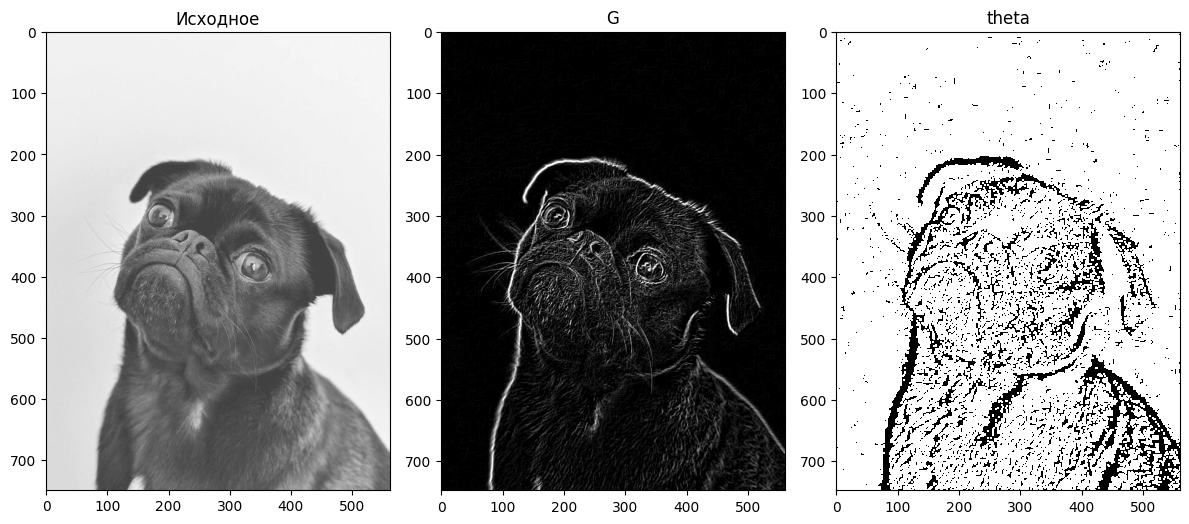

In [232]:


G, theta = convolution_Sobele(pic)

plt.figure(figsize=(12,15))
plt.subplot(1,3,1)
plt.imshow(pic,cmap='gray',vmin=0,vmax=255)
plt.title('Исходное')

plt.subplot(1,3,2)
plt.imshow(G,cmap='gray',vmin=0,vmax=255)
plt.title('G')

plt.subplot(1,3,3)
plt.imshow(theta,cmap='gray',vmin=0,vmax=255)
plt.title('theta')
plt.tight_layout()
plt.show()